In [1]:
from Dental_Tool.KFold_v2 import *
from Dental_Tool.Dataloader import *
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

Using TensorFlow backend.


In [2]:
directory = [ 
                "Dental_Data/PBL/10_20200825", "Dental_Data/PBL/10_20200825_Flip", 
                "Dental_Data/PBL/10_clahe_20200825", "Dental_Data/PBL/10_clahe_20200825_Flip"
            ]


directory = [ i + "/mapping.json" for i in directory]
argscale_num = 80

data = load_json(directory)
dataset = json_2_dataframe_PBL(data)
K_Fold_statisatic_dental_for_class(dataset) // 80

,Stage_0,Stage_1,Stage_2,Stage_3
1,3.0,3.0,6.0,3.0
2,15.0,64.0,52.0,23.0
3,27.0,64.0,48.0,27.0
4,46.0,86.0,37.0,10.0
5,37.0,73.0,27.0,5.0
6,63.0,59.0,12.0,6.0
7,57.0,80.0,35.0,17.0
8,55.0,82.0,31.0,14.0
9,48.0,78.0,25.0,9.0
10,47.0,79.0,29.0,8.0


In [3]:
train_csv = pd.read_csv("Results/Emsemble_5_Fold______20200831-121642/Fold_2/table/train_dataset.csv")
valid_csv = pd.read_csv("Results/Emsemble_5_Fold______20200831-121642/Fold_2/table/valid_dataset.csv")
test_csv = pd.read_csv("Results/Emsemble_5_Fold______20200831-121642/Fold_2/table/test_dataset.csv")

K_Fold_print_class_ratio(train_csv)
K_Fold_print_class_ratio(valid_csv)
K_Fold_print_class_ratio(test_csv)

Class 0 : 15040, Class 1 : 15040, Class 2 : 15040
Stage 0 : 7520, Stage 1 : 7520, Stage 2 : 15040, Stage 3 : 15040
Class 0 : 9120, Class 1 : 9120, Class 2 : 9120
Stage 0 : 4560, Stage 1 : 4560, Stage 2 : 9120, Stage 3 : 9120
Class 0 : 5200, Class 1 : 5200, Class 2 : 5200
Stage 0 : 2600, Stage 1 : 2600, Stage 2 : 5200, Stage 3 : 5200


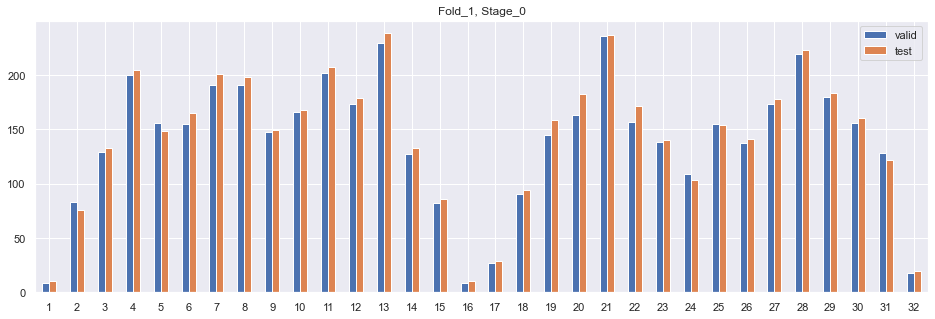

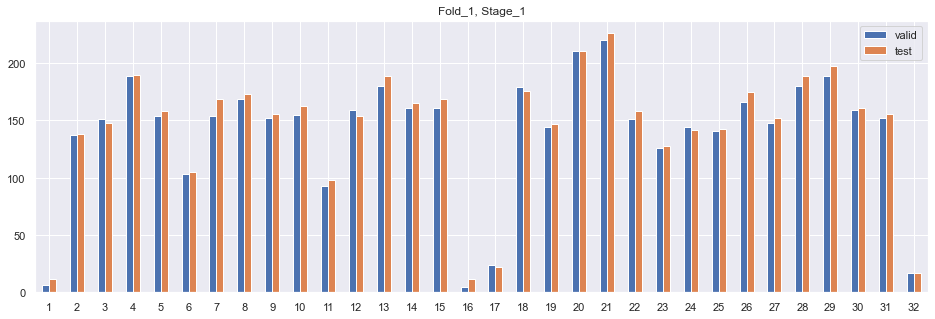

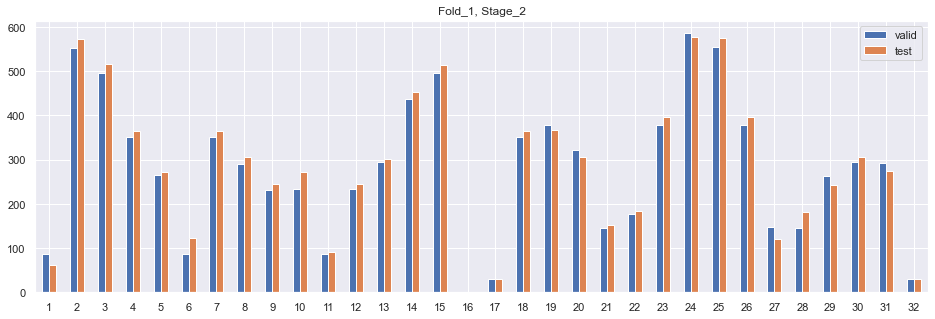

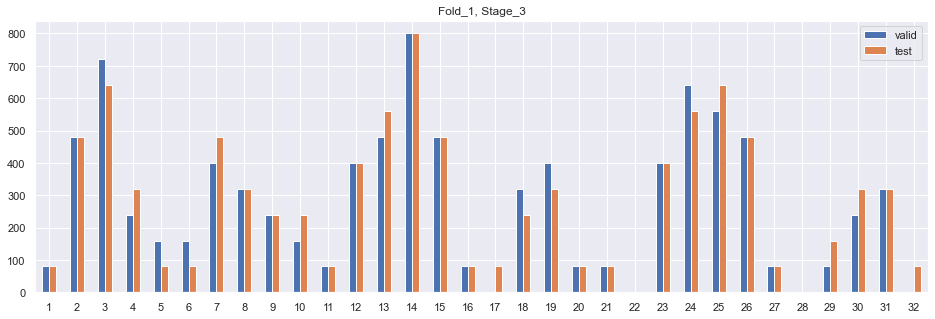

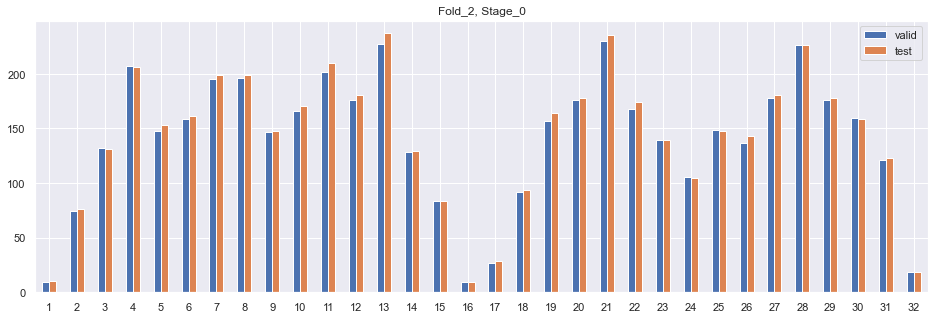

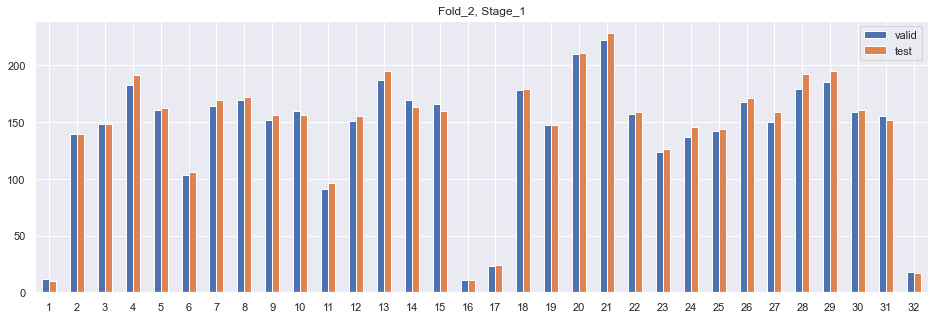

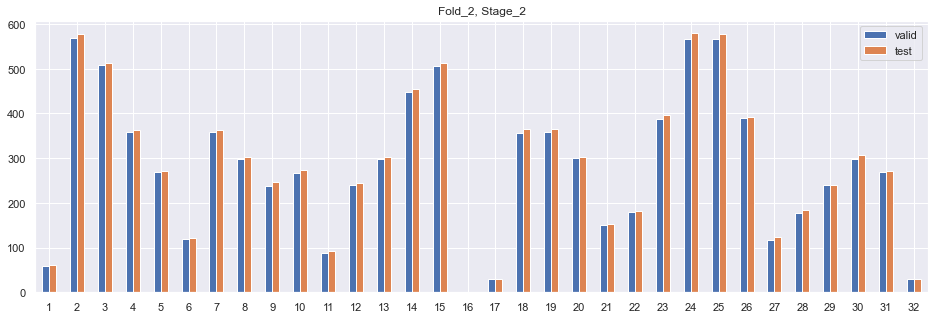

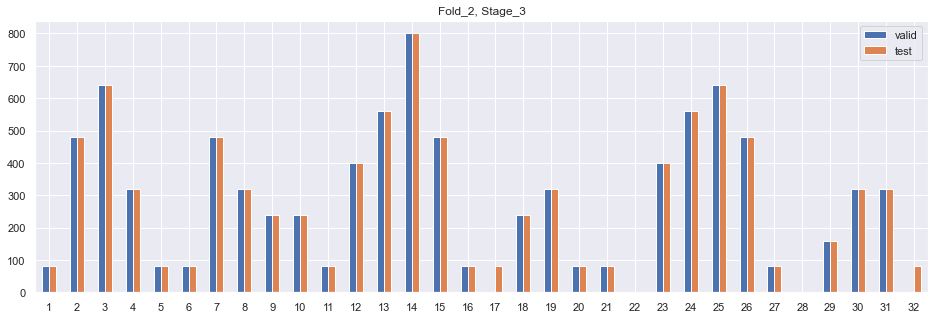

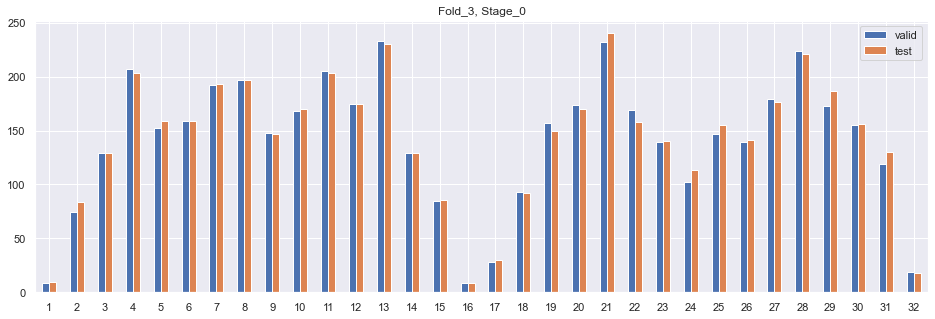

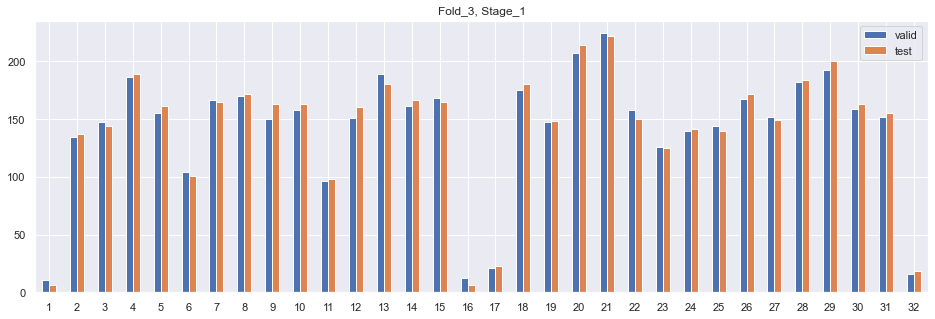

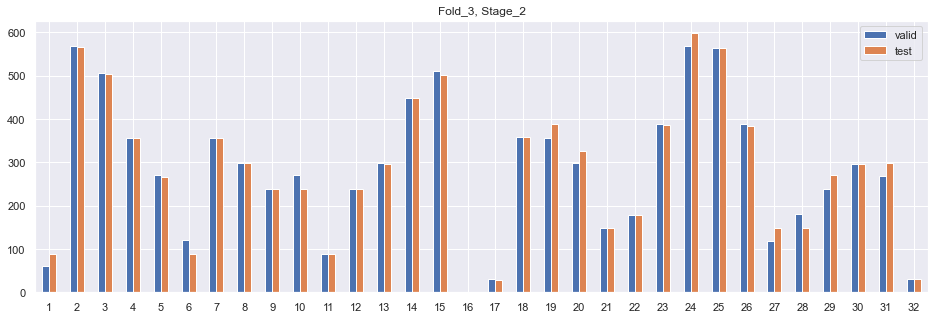

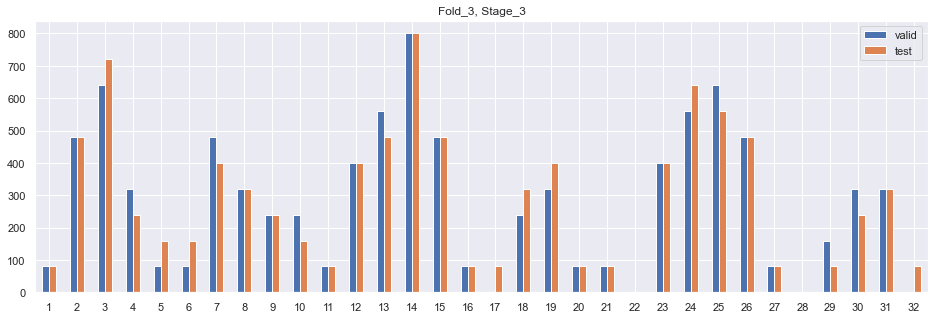

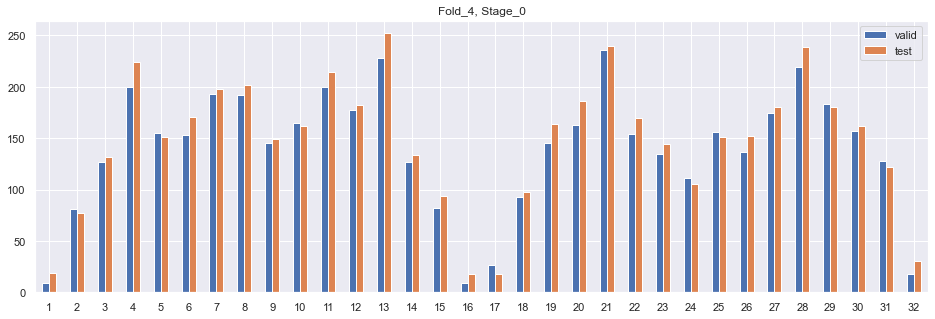

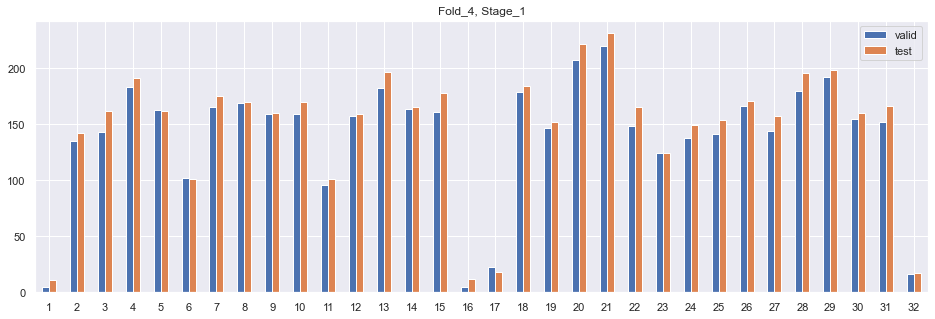

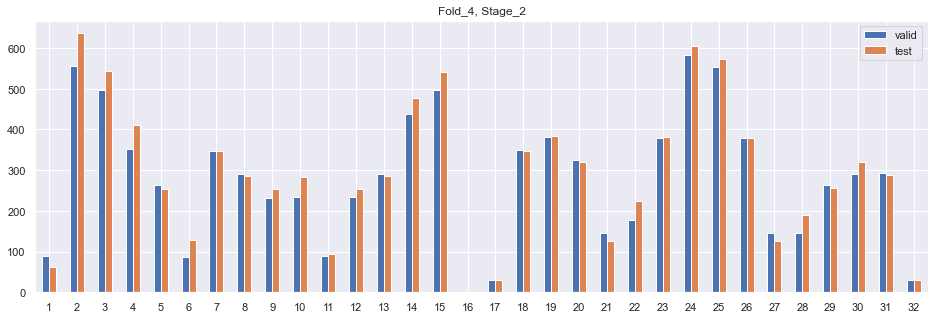

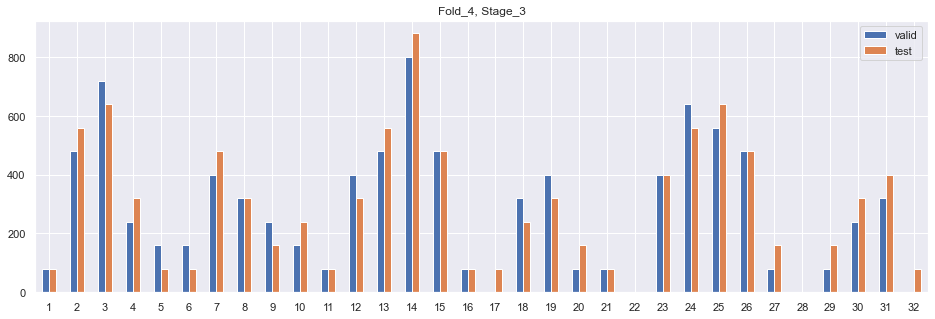

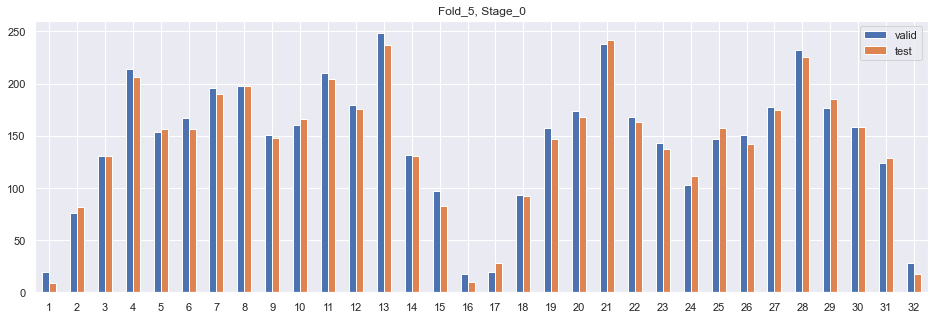

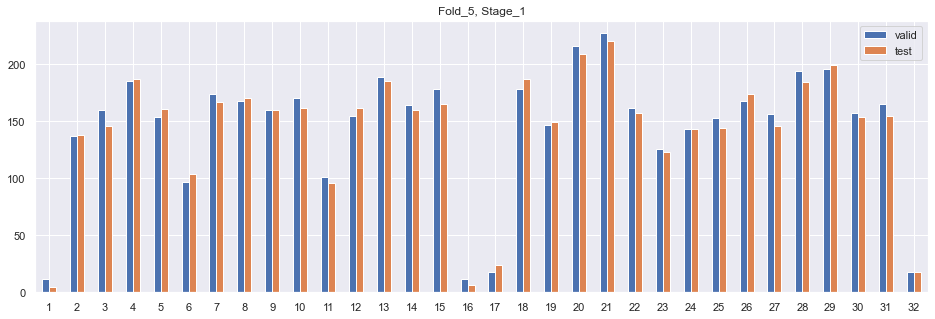

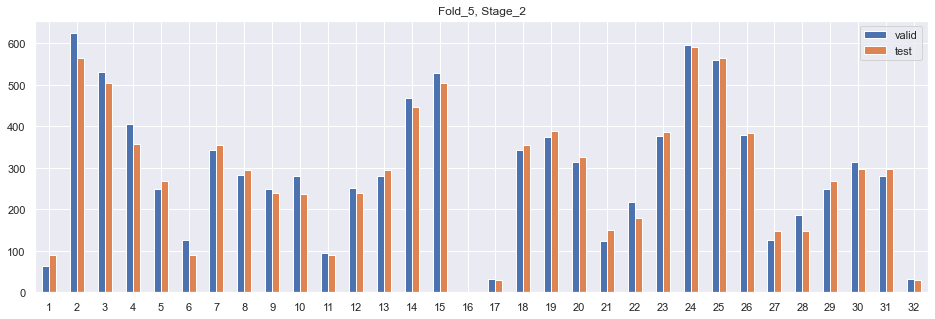

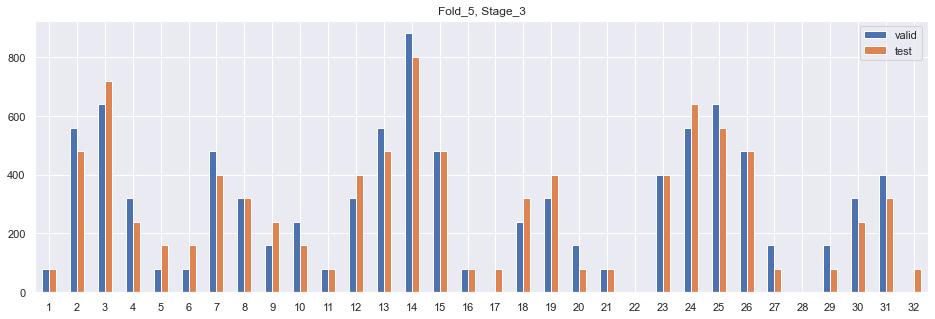

In [5]:
root_dir = "Emsemble_5_Fold______interdental20200906-170109"
for i in range(1, 6, 1):
#         train_csv = pd.read_csv(f"Results/{root_dir}/Fold_{i}/table/train_dataset.csv")
        valid_csv = pd.read_csv(f"Results/{root_dir}/Fold_{i}/table/valid_dataset.csv")
        test_csv = pd.read_csv(f"Results/{root_dir}/Fold_{i}/table/test_dataset.csv")

        for stage in range(4):
#                 train = K_Fold_statisatic_dental_for_class(train_csv)[f"Stage_{stage}"]
                valid = K_Fold_statisatic_dental_for_class(valid_csv)[f"Stage_{stage}"]
                test  = K_Fold_statisatic_dental_for_class(test_csv)[f"Stage_{stage}"]

                all_data = pd.concat([valid, test], axis=1)
                all_data.columns = ["valid", "test"]
                sns.set()
                all_data.plot.bar(rot=0, figsize=(16,5), title=f"Fold_{i}, Stage_{stage}")

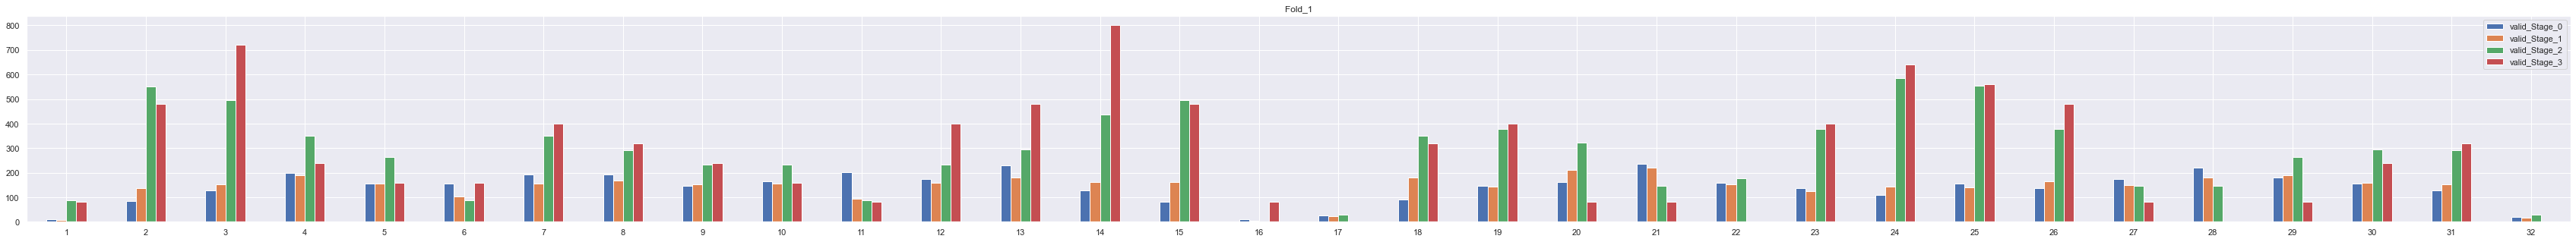

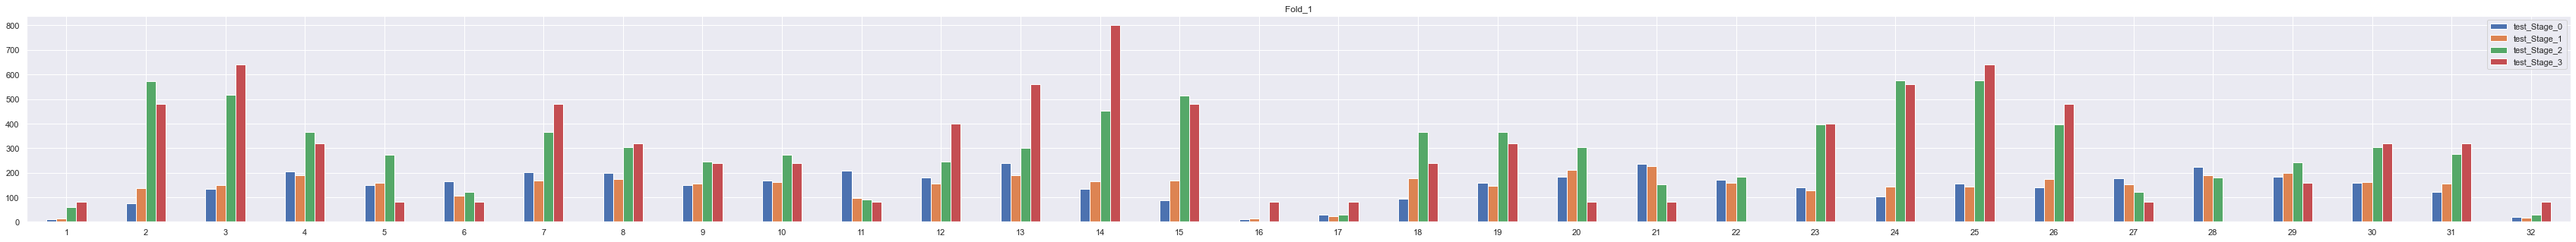

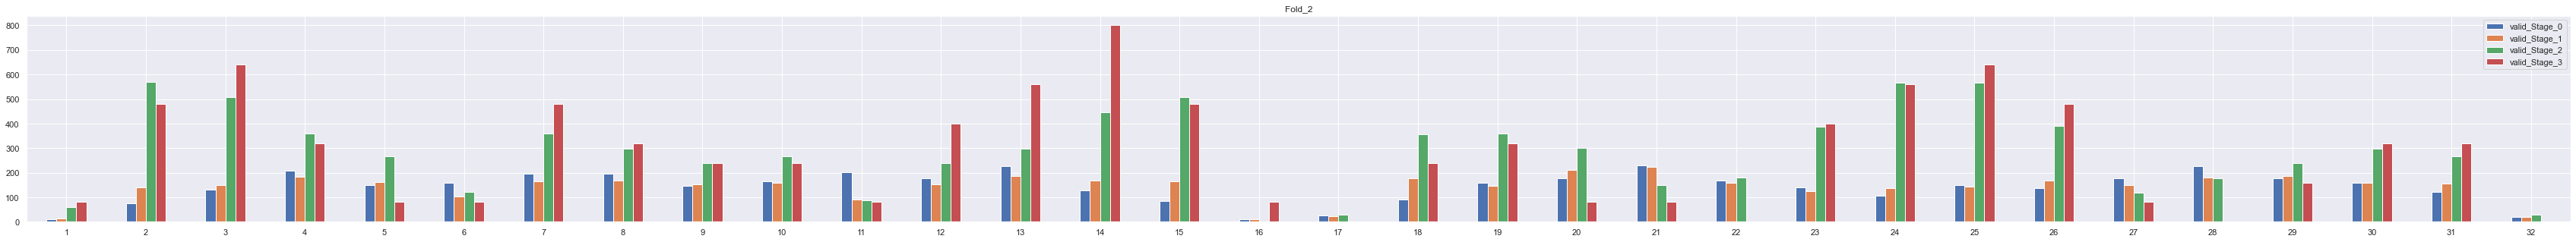

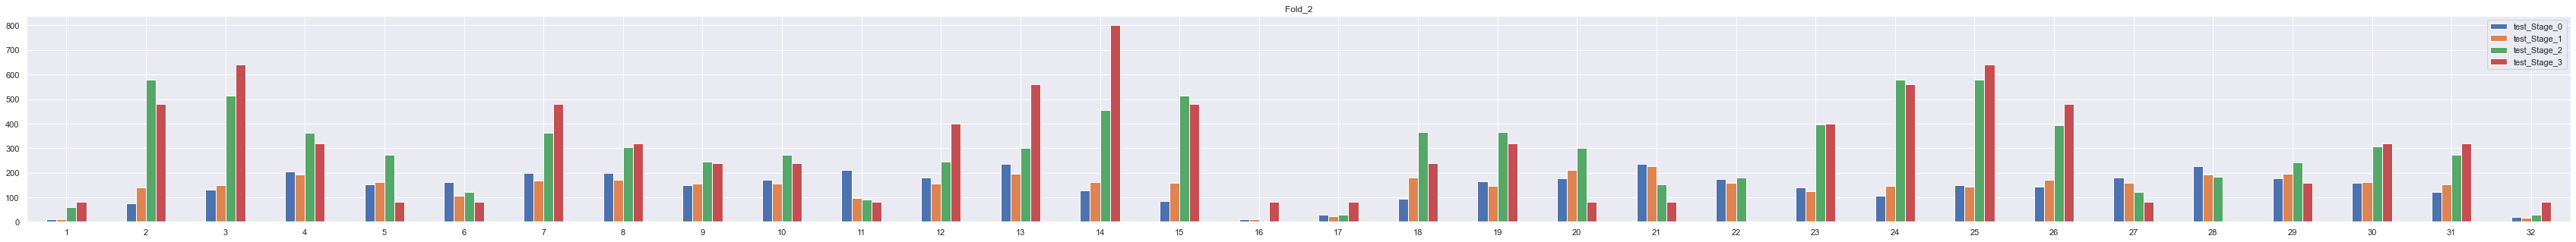

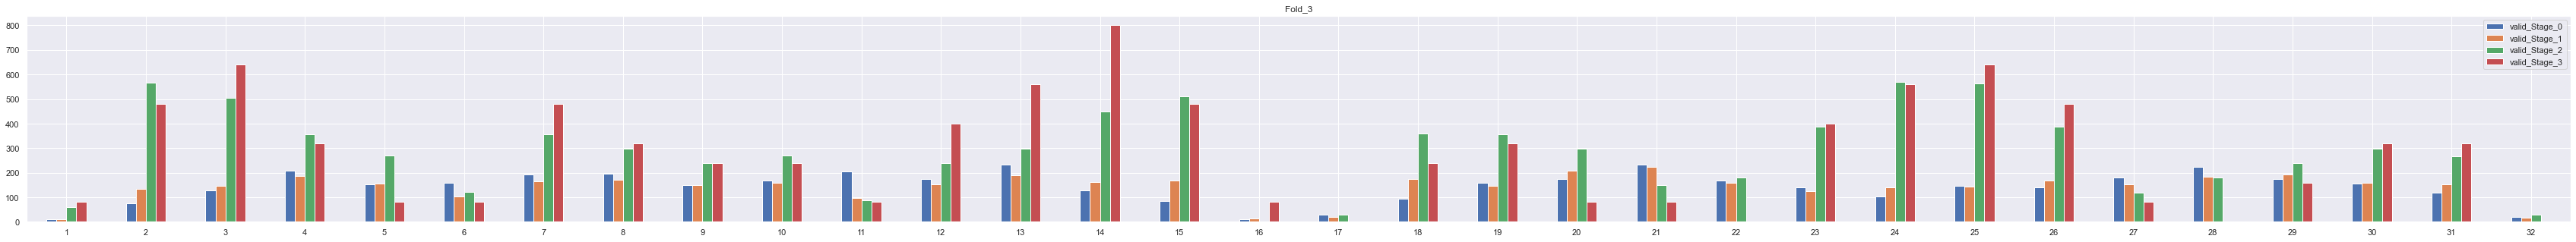

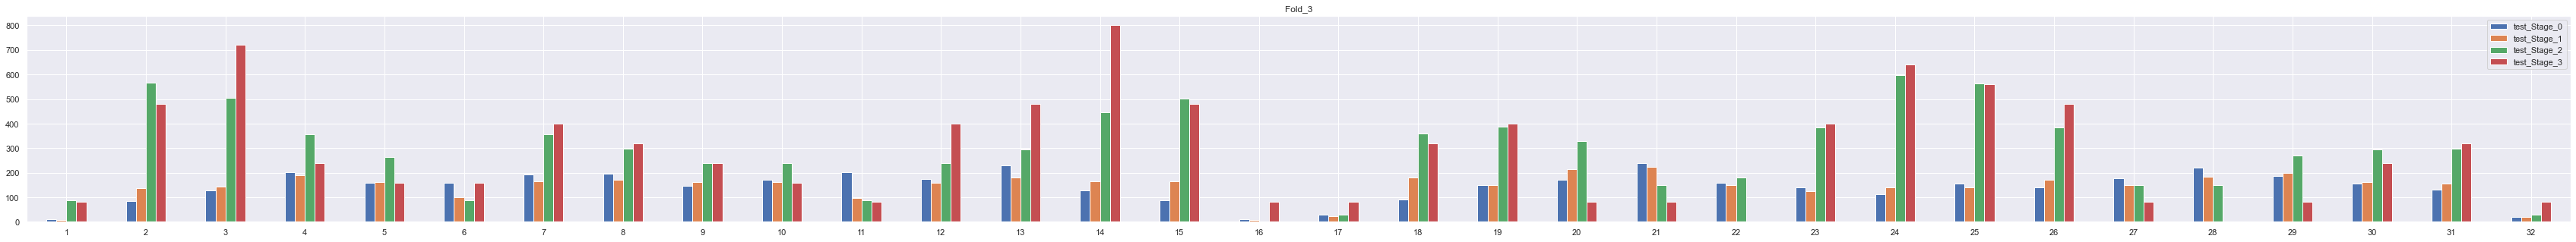

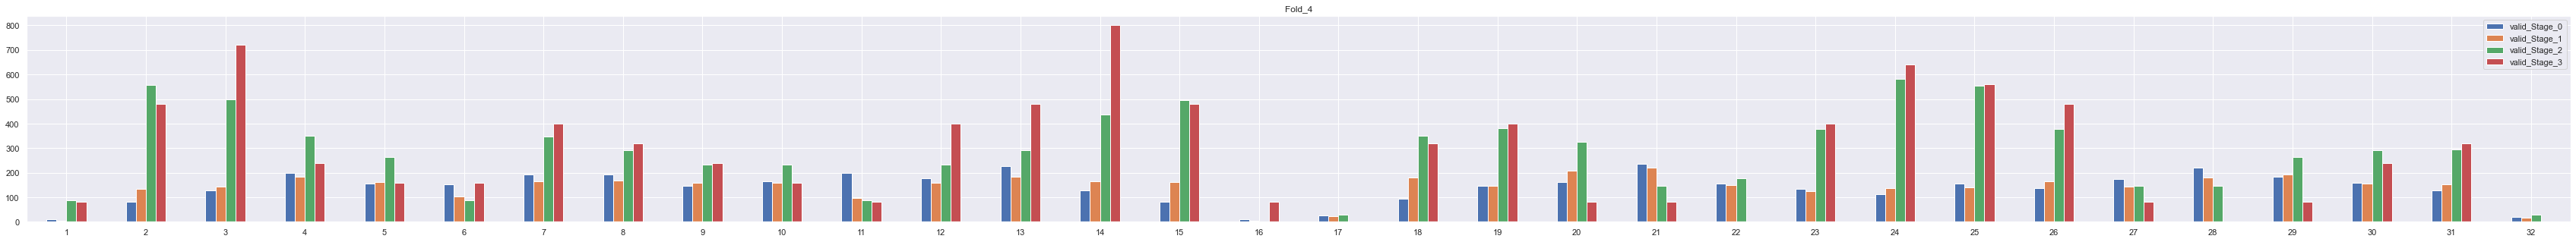

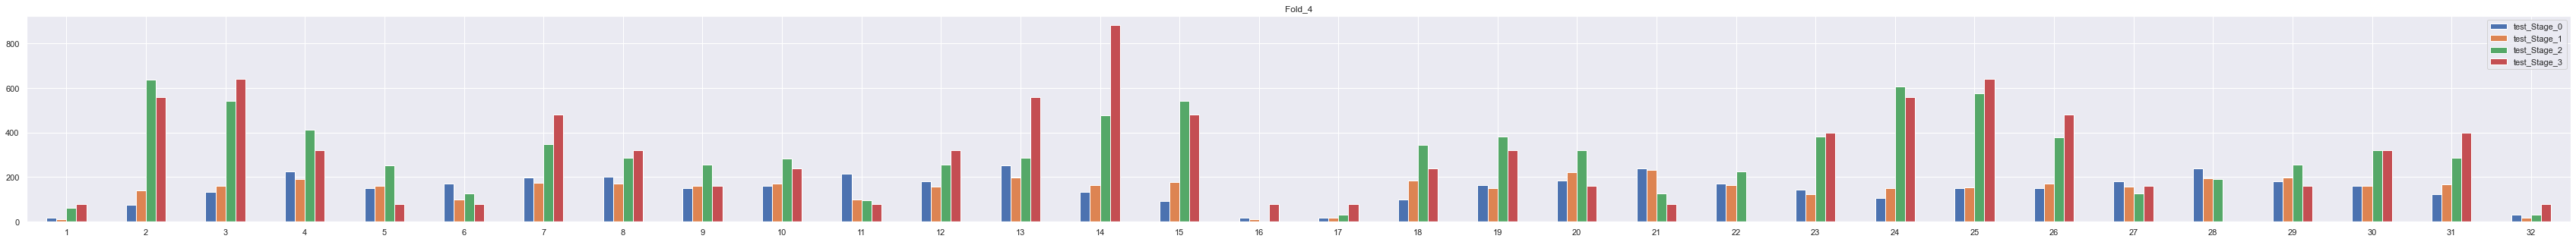

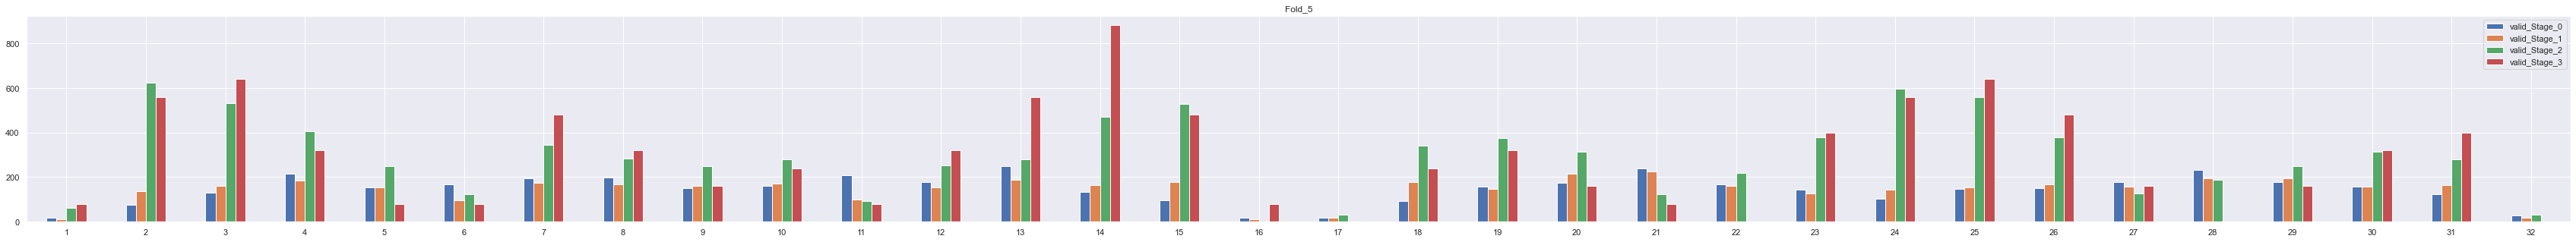

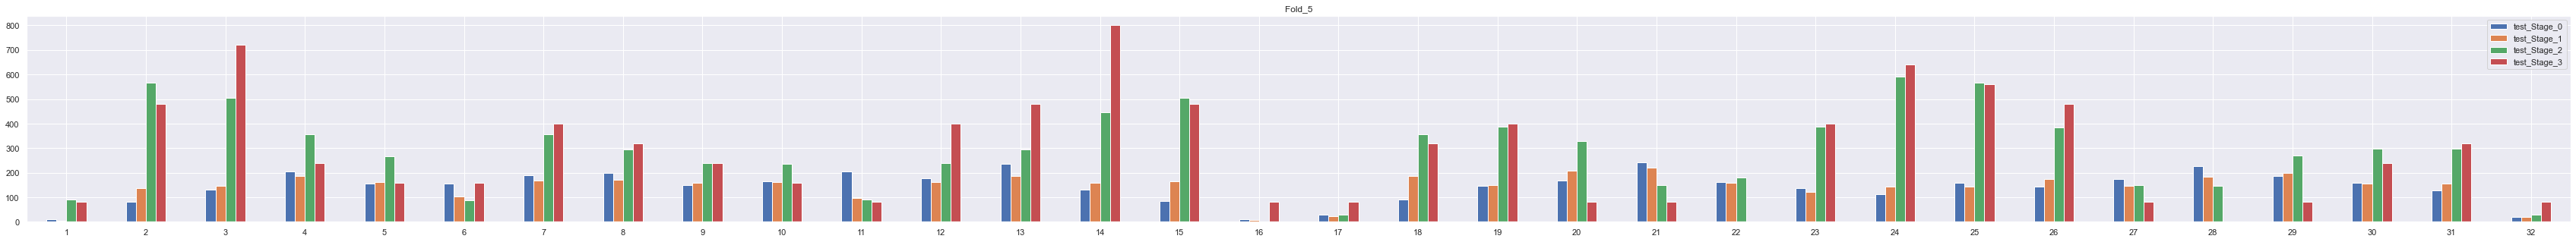

In [13]:
if not os.path.isdir("Analyze_Result") : os.makedirs("Analyze_Result")
for i in range(1, 6, 1):
#         train_csv = pd.read_csv(f"Results/{root_dir}/Fold_{i}/table/train_dataset.csv")
        valid_csv = pd.read_csv(f"Results/{root_dir}/Fold_{i}/table/valid_dataset.csv")
        test_csv = pd.read_csv(f"Results/{root_dir}/Fold_{i}/table/test_dataset.csv")
        
#         train = K_Fold_statisatic_dental_for_class(train_csv)
        valid = K_Fold_statisatic_dental_for_class(valid_csv)
        test  = K_Fold_statisatic_dental_for_class(test_csv)
        
#         train.columns = [ "train_" + i for i in train.columns ]
        valid.columns = [ "valid_" + i for i in valid.columns ]
        test.columns  = [ "test_"  + i for i in test.columns ]
        all_data = pd.concat([train, valid, test], axis=1)
        
        df_valid = all_data[ [ "valid_Stage_0", "valid_Stage_1", "valid_Stage_2", "valid_Stage_3"] ]

        df_test  = all_data[ [ "test_Stage_0", "test_Stage_1", "test_Stage_2", "test_Stage_3"] ]
        
#         df = all_data[
                    
#                     ["train_Stage_0", "valid_Stage_0", "test_Stage_0",
#                      "train_Stage_1", "valid_Stage_1", "test_Stage_1",
#                      "train_Stage_2", "valid_Stage_2", "test_Stage_2",
#                      "train_Stage_3", "valid_Stage_3", "test_Stage_3"]
#                ]
        
        
        sns.set()
        df_valid.plot.bar(rot=0, figsize=(60,5), title=f"Fold_{i}")
        
        plt.savefig(f"Analyze_Result\Fold_{i}_valid.png")
        
        df_test.plot.bar(rot=0, figsize=(60,5), title=f"Fold_{i}")
        plt.savefig(f"Analyze_Result\Fold_{i}_test.png")

In [7]:
# K_Fold_statisatic_dental_for_class(train_csv)

In [8]:
# K_Fold_statisatic_dental_for_class(valid_csv)

In [9]:
# K_Fold_statisatic_dental_for_class(test_csv)

In [10]:
train_csv_2 = pd.read_csv("Results/Emsemble_5_Fold______20200831-121642/Fold_2/table/train_dataset.csv")
valid_csv_2 = pd.read_csv("Results/Emsemble_5_Fold______20200831-121642/Fold_2/table/valid_dataset.csv")
test_csv_2 = pd.read_csv("Results/Emsemble_5_Fold______20200831-121642/Fold_2/table/test_dataset.csv")

K_Fold_print_class_ratio(train_csv_2)
K_Fold_print_class_ratio(valid_csv_2)
K_Fold_print_class_ratio(test_csv_2)

K_Fold_statisatic_dental_for_class(valid_csv_2)

Class 0 : 15040, Class 1 : 15040, Class 2 : 15040
Stage 0 : 7520, Stage 1 : 7520, Stage 2 : 15040, Stage 3 : 15040
Class 0 : 9120, Class 1 : 9120, Class 2 : 9120
Stage 0 : 4560, Stage 1 : 4560, Stage 2 : 9120, Stage 3 : 9120
Class 0 : 5200, Class 1 : 5200, Class 2 : 5200
Stage 0 : 2600, Stage 1 : 2600, Stage 2 : 5200, Stage 3 : 5200


,Stage_0,Stage_1,Stage_2,Stage_3
1,16.0,9.0,85.0,80.0
2,50.0,146.0,508.0,560.0
3,113.0,149.0,510.0,560.0
4,161.0,168.0,385.0,160.0
5,145.0,159.0,297.0,80.0
6,240.0,141.0,170.0,160.0
7,211.0,148.0,295.0,400.0
8,180.0,169.0,297.0,480.0
9,195.0,171.0,212.0,400.0
10,179.0,179.0,384.0,320.0


In [11]:
K_Fold_statisatic_dental_for_class(test_csv_2)

,Stage_0,Stage_1,Stage_2,Stage_3
1,11.0,6.0,31.0,80.0
2,34.0,81.0,312.0,320.0
3,55.0,76.0,283.0,400.0
4,100.0,107.0,219.0,160.0
5,77.0,89.0,155.0,80.0
6,133.0,69.0,62.0,80.0
7,122.0,103.0,219.0,240.0
8,121.0,100.0,188.0,160.0
9,100.0,95.0,160.0,80.0
10,100.0,94.0,156.0,80.0
